In [4]:
!wget https://www.dropbox.com/scl/fi/wnkjljzosgf03sfeh84sw/Data2-1.zip?rlkey=jbn3610kth7poc6dmqa6eo1f1&st=mg5jaluh&dl=0

Data2-1.zip?rlkey=j 100%[===================>]   2.07G  10.5MB/s    in 7m 35s  

2024-04-20 05:27:03 (4.67 MB/s) - ‘Data2-1.zip?rlkey=jbn3610kth7poc6dmqa6eo1f1’ saved [2225990815/2225990815]



In [5]:
!unzip /content/Data2-1.zip?rlkey=jbn3610kth7poc6dmqa6eo1f1

Streaming output truncated to the last 5000 lines.
  inflating: content/train_images/tumor/volume-15_slice_334.jpg  
  inflating: content/train_images/tumor/volume-18_slice_20.jpg  
  inflating: content/train_images/tumor/volume-23_slice_138.jpg  
  inflating: content/train_images/tumor/volume-6_slice_468.jpg  
  inflating: content/train_images/tumor/volume-21_slice_202.jpg  
  inflating: content/train_images/tumor/volume-22_slice_216.jpg  
  inflating: content/train_images/tumor/volume-8_slice_456.jpg  
  inflating: content/train_images/tumor/volume-11_slice_172.jpg  
  inflating: content/train_images/tumor/volume-25_slice_156.jpg  
  inflating: content/train_images/tumor/volume-11_slice_404.jpg  
  inflating: content/train_images/tumor/volume-3_slice_256.jpg  
  inflating: content/train_images/tumor/volume-40_slice_34.jpg  
  inflating: content/train_images/tumor/volume-6_slice_168.jpg  
  inflating: content/train_images/tumor/volume-8_slice_40.jpg  
  inflating: content/train_images

In [6]:
import warnings
warnings.filterwarnings('ignore') #this code suppresses any warnings that might be issued during the execution of the Python script. It's often used when you want to suppress certain types of warnings that you know won't affect the functionality of your code, or when you want to keep the output clean and free of warning messages.

In [8]:
import os #offers a wide range of functions for interacting with the operating system, such as working with files and directories.
import shutil #provides a higher-level interface for file operations, offering functions to copy, move, and delete files and directories.
import random # It provides functions for generating random integers, selecting random elements from a sequence, shuffling sequences randomly, and more.

ROOT_DIR = "/content/Liver tumour data/Liver tumour dataset" #root directory path
TRAIN_DIR = "./train" #new directory train
TEST_DIR = "./test" #new directory test
VAL_DIR = "./validation" #new directory validation
TRAIN_RATIO = 0.7 #70% of the data will be used for training.
VAL_RATIO = 0.15 #15% of the data will be used for validation

if not os.path.exists(TRAIN_DIR): #if Train directory doesn't exists make a new one
    os.makedirs(TRAIN_DIR)
if not os.path.exists(TEST_DIR): #if Test directory doesn't exists make a new one
    os.makedirs(TEST_DIR)
if not os.path.exists(VAL_DIR): #if Validation directory doesn't exists make a new one
    os.makedirs(VAL_DIR)

for class_dir in os.listdir(ROOT_DIR):
    if os.path.isdir(os.path.join(ROOT_DIR, class_dir)):
        images = os.listdir(os.path.join(ROOT_DIR, class_dir))
        random.shuffle(images)  # Shuffle images to randomize the selection

        # Split images based on the ratios
        train_split_index = int(len(images) * TRAIN_RATIO)
        val_split_index = int(len(images) * (TRAIN_RATIO + VAL_RATIO))

        train_images = images[:train_split_index]
        val_images = images[train_split_index:val_split_index]
        test_images = images[val_split_index:]

        # Create class directories in train, test, and validation directories if they don't exist
        train_class_dir = os.path.join(TRAIN_DIR, class_dir)
        test_class_dir = os.path.join(TEST_DIR, class_dir)
        val_class_dir = os.path.join(VAL_DIR, class_dir)
        if not os.path.exists(train_class_dir):
            os.makedirs(train_class_dir)
        if not os.path.exists(test_class_dir):
            os.makedirs(test_class_dir)
        if not os.path.exists(val_class_dir):
            os.makedirs(val_class_dir)

        # Copy images to train, test, and validation directories
        for img in train_images:
            src = os.path.join(ROOT_DIR, class_dir, img)
            dst = os.path.join(train_class_dir, img)
            shutil.copy(src, dst)

        for img in val_images:
            src = os.path.join(ROOT_DIR, class_dir, img)
            dst = os.path.join(val_class_dir, img)
            shutil.copy(src, dst)

        for img in test_images:
            src = os.path.join(ROOT_DIR, class_dir, img)
            dst = os.path.join(test_class_dir, img)
            shutil.copy(src, dst)

print("Data divided into train, test, and validation sets successfully.")

Data divided into train, test, and validation sets successfully.


In [9]:
from keras.layers import Input, Lambda, Dense, Flatten # used in constructing neural network models
from keras.models import Model #for constructing arbitrary neural network architectures
from keras.applications.vgg19 import VGG19 #imports the pre-trained VGG19 model, which is a popular convolutional neural network architecture often used for image classification tasks.
from keras.applications.vgg16 import preprocess_input #preprocessing input images to be compatible with the VGG16 model.
from keras.preprocessing import image #for image preprocessing and data augmentation
from keras.preprocessing.image import ImageDataGenerator # for image preprocessing and data augmentation
from keras.models import Sequential #for constructing models layer-by-layer.
import numpy as np # used to array and numerical operations
from glob import glob #retrieve files/pathnames matching a specified pattern.
import matplotlib.pyplot as plt #used for data visualization in Python.

In [10]:
IMAGE_SIZE = [224, 224] #resizing image to square with both dimensions set to 224 pixels

In [11]:
train_path = '/content/train' #training dataset path
valid_path = '/content/test' #validation dataset path

In [12]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#'imagenet' means that the model will be initialized with weights pre-trained on the ImageNet dataset.
#IMAGE_SIZE + [3], which means the input shape is a tuple consisting of the dimensions specified in the IMAGE_SIZE constant (224x224 in this case) followed by the number 3, indicating that the input images are RGB (3 color channels: Red, Green, Blue).
#Setting it to False means that these layers, which are typically used for image classification on ImageNet, will not be included. This is often done when using pre-trained models for feature extraction or transfer learning, as it allows you to add your own custom layers on top of the pre-trained model.

80134624/80134624 [==============================] - 0s 0us/step


In [13]:
for layer in vgg.layers:
  layer.trainable = False #This code iterates over all the layers in the VGG19 model (vgg) and sets the trainable attribute of each layer to False.when a layer is not trainable, its parameters remain fixed, and they won't be updated during training.

In [14]:
folders = glob('/content/train/*') # search for folders within the directory /content/train/.The asterisk (*) is a wildcard character that matches any sequence of characters in a filename or directory name

In [15]:
x = Flatten()(vgg.output) #This line creates a new layer in the neural network by applying the Flatten() operation to the output of the VGG19 model (vgg.output). The Flatten() layer reshapes the output tensor from the convolutional layers into a 1D tensor, which is required as input for the subsequent fully connected layers.
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)#This line adds a new fully connected layer to the neural network. It creates a Dense layer with the number of units equal to the number of folders found earlier (likely representing the number of classes or categories in the dataset). The activation function used is softmax, which is commonly used for multi-class classification problems as it outputs probabilities for each class.

In [16]:
model = Model(inputs=vgg.input, outputs=prediction) #This creates a new Model object where vgg.input is set as the input and prediction is set as the output.
#vgg.input represents the input tensor of the VGG19 model (vgg). It defines the placeholder for the input images.
#An input tensor in the context of neural networks refers to the multidimensional array of data that serves as the input to the network

In [17]:
model.summary() #provides summary of the model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255, #This parameter rescales the pixel values of the images. By dividing each pixel value by 255, the pixel values will be normalized to the range [0, 1]. This is a common preprocessing step in deep learning to ensure that the input values are within a similar range, which can improve training performance.
                                   shear_range = 0.2, # Shear transformation is a type of geometric transformation that tilts the shapes of objects in an image along a particular axis. This parameter specifies the range within which the shear transformation will be applied. In this case, shear_range = 0.2 means that the shear transformation will be applied with a maximum shear angle of 20 degrees.
                                   zoom_range = 0.2, # Here, zoom_range = 0.2 means that the image can be zoomed in or out by up to 20%.
                                   horizontal_flip = True) #horizontal flipping will be applied.

In [19]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
training_set = train_datagen.flow_from_directory('/content/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32, #the number of images to include in each batch. During training, the model will be updated based on the predictions made on each batch of images. Here, the batch size is set to 32.
                                                 class_mode = 'categorical') #In this case, 'categorical' indicates that the labels are one-hot encoded. Each class will have its corresponding column in the label array, with a value of 1 indicating the presence of that class and 0 indicating the absence.

Found 6478 images belonging to 2 classes.


In [21]:
test_set = test_datagen.flow_from_directory('/content/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1389 images belonging to 2 classes.


In [22]:
model.compile(
  loss='categorical_crossentropy', #used for multi-class classification problems where the output labels are one-hot encoded. It calculates the cross-entropy loss between the predicted probability distribution and the true probability distribution of the classes.
  optimizer='adam', #'adam' refers to the Adam optimizer, which is an adaptive learning rate optimization algorithm that is commonly used in deep learning tasks. It dynamically adjusts the learning rate during training, potentially leading to faster convergence and better performance.
  metrics=['accuracy'] #'accuracy' is a common metric used in classification problems. It calculates the proportion of correctly predicted labels compared to the total number of samples.
)

In [23]:
num_classes = len(os.listdir(TRAIN_DIR)) #num_classes will contain the number of classes found in the training directory. This information is often used in tasks such as image classification, where each directory corresponds to a different class, and the number of classes determines the output size of the model's final layer.

In [24]:
prediction = Dense(num_classes, activation='softmax')(x)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

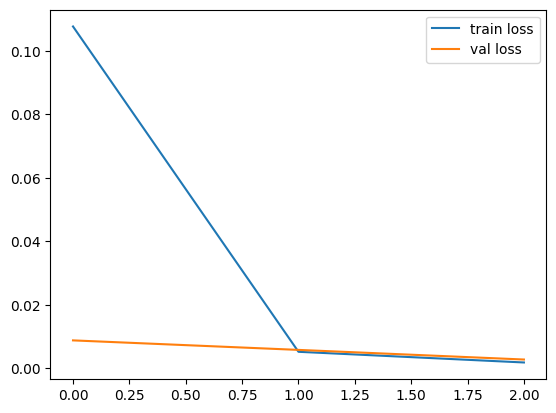

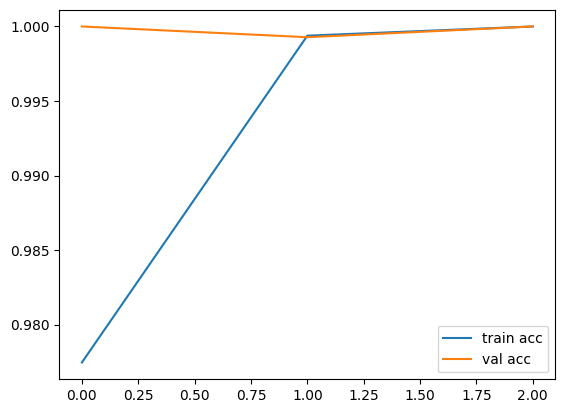

<Figure size 640x480 with 0 Axes>

In [26]:
from keras.layers import Input, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator

# Count the number of classes based on the folders in the training directory
num_classes = len(os.listdir(TRAIN_DIR))

# Load the pre-trained VGG19 model
vgg = VGG19(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

# Freeze the layers in the pre-trained VGG19 model
for layer in vgg.layers:
    layer.trainable = False

# Flatten the output of the VGG19 model
x = Flatten()(vgg.output)

# Add a dense layer with softmax activation for classification
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=vgg.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Create image data generators for training and testing data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
r = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=3,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:
import tensorflow as tf #machine learning library

from keras.models import load_model #used to load the model in the notebook

model.save('tumour_vgg19.h5')

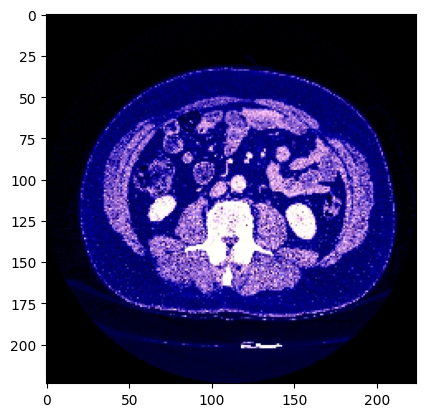

Input array shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 18ms/step
Prediction: 0.9935874
The MRI is not having a tumour


In [50]:
from keras.preprocessing.image import load_img,img_to_array
import keras
path = "/content/Liver tumour data/Liver tumour dataset/normal/volume-32_slice_10.jpg" #path
img = load_img(path, target_size = (224,224))
input_arr = img_to_array(img)/255 #This parameter rescales the pixel values of the images. By dividing each pixel value by 255, the pixel values will be normalized to the range [0, 1]. This is a common preprocessing step in deep learning to ensure that the input values are within a similar range, which can improve training performance.
plt.imshow(input_arr) #display image
plt.show()

input_arr = np.expand_dims(input_arr,axis=0) #expands the dimensions of the input array (input_arr) along the specified axis (axis 0) using NumPy's expand_dims function. This is done to match the expected input shape of the model.
print("Input array shape:", input_arr.shape) #his line prints the shape of the input array after expanding its dimensions.
pred = model.predict(input_arr)[0][0] #this line makes predictions using the pre-trained machine learning model (model) on the input array (input_arr). It calls the predict method of the model, passing the input array as an argument. The result is a prediction array, and [0][0] is used to extract the predicted value from the prediction array. This assumes that the model outputs a single scalar prediction value.
print ("Prediction:",pred)
if pred < 0.5:
  print("The MRI is having a tumour")
else:
  print("The MRI is not having a tumour")
